The goal is to understand what PCA is doing, not just run a library call.

##### We will:

* Create 2D data
* Center it
* Find principal directions
* Project data
* Visualize every step

### 1. Create correlated 2D data (why PCA is needed)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# generate correlated data

X = np.random.randn(200)
y = 2*X + 0.5*np.random.randn(200)

X = np.column_stack((X,y))
X

array([[ 1.76405235,  3.34351377],
       [ 0.40015721,  0.68062483],
       [ 0.97873798,  2.50730577],
       [ 2.2408932 ,  4.80941826],
       [ 1.86755799,  4.05518174],
       [-0.97727788, -2.76303378],
       [ 0.95008842,  1.88801377],
       [-0.15135721, -0.67172987],
       [-0.10321885, -0.0664754 ],
       [ 0.4105985 ,  0.77212181],
       [ 0.14404357,  0.7431766 ],
       [ 1.45427351,  3.06715612],
       [ 0.76103773,  1.91523943],
       [ 0.12167502,  0.01014048],
       [ 0.44386323,  0.41550334],
       [ 0.33367433,  0.46232381],
       [ 1.49407907,  2.97964794],
       [-0.20515826, -0.22074066],
       [ 0.3130677 ,  1.75578988],
       [-0.85409574, -1.72932005],
       [-2.55298982, -5.58395213],
       [ 0.6536186 ,  1.1342463 ],
       [ 0.8644362 ,  1.49707441],
       [-0.74216502, -1.2435893 ],
       [ 2.26975462,  3.76911074],
       [-1.45436567, -2.87710035],
       [ 0.04575852,  0.1697703 ],
       [-0.18718385, -0.25827718],
       [ 1.53277921,

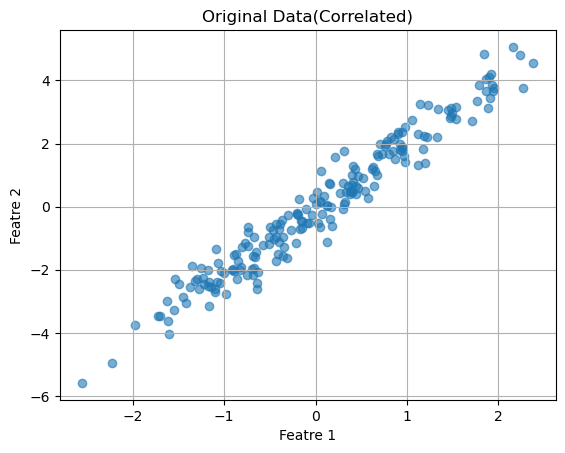

In [10]:
plt.scatter(X[:,0],X[:,1],alpha = 0.6)
plt.xlabel("Featre 1")
plt.ylabel("Featre 2")
plt.title("Original Data(Correlated)")
plt.grid()
plt.show()

#### Interpretation
* Data lives mostly along one direction
* Two dimensions exist, but one carries most information

### 2. Mean-center the data (critical step)

PCA only cares about variance, not absolute position.

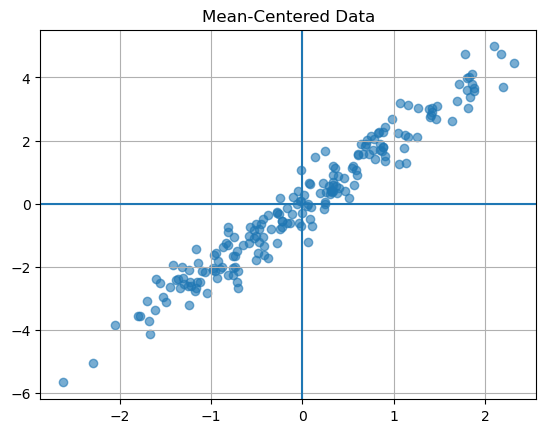

In [19]:
X_mean = np.mean(X,axis = 0 )
X_centered = X - X_mean

plt.scatter(X_centered[:,0],X_centered[:,1],alpha = 0.6)
plt.axhline(0)
plt.axvline(0)
plt.title("Mean-Centered Data")
plt.grid()
plt.show()

### 3. Covariance matrix (how features vary together)

In [20]:
cov_matrix = np.cov(X_centered.T)
print("Covariance matrix:\n",cov_matrix)

Covariance matrix:
 [[1.04854721 2.13370199]
 [2.13370199 4.56417088]]


##### Meaning 
* Diagonal: variance of each feature 
* Off-diagonal: how features move together

### Eigenvectors = principal directions

In [23]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:",eigenvalues)
print("\n Eigenvectors:\n",eigenvectors)

Eigenvalues: [0.04183619 5.57088191]

 Eigenvectors:
 [[-0.90439106 -0.4267046 ]
 [ 0.4267046  -0.90439106]]


* Large eigenvalue → more variance
* Corresponding eigenvector → direction of maximum spread

### 5. Visualize principal components

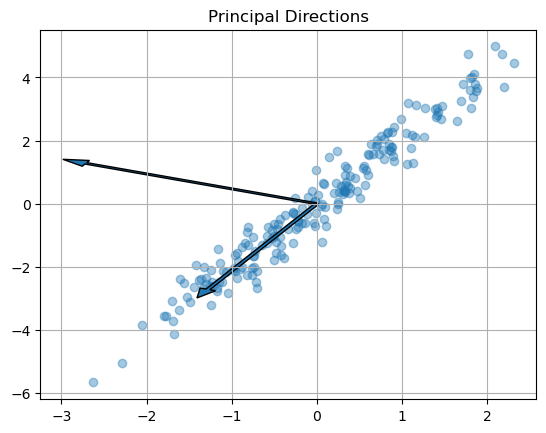

In [24]:
plt.scatter(X_centered[:,0],X_centered[:,1],alpha=0.4)
for i in range(2):
    vec = eigenvectors[:,i]
    plt.arrow(0,0,vec[0]*3,vec[1]*3,
             width = 0.05, head_width = 0.2)
plt.title("Principal Directions")
plt.grid()
plt.show()

##### Key insight
* PCA rotates the coordinate system
* New axes align with maximum variance

### 6. Sort components by importance

In [26]:
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:,idx]
eigenvalues = eigenvalues[idx]

#### Now
* First eigenvector = PC1
* Second eigenvector = PC2

### 7. Projected data onto principal components

In [28]:
X_pca = X_centered@eigenvectors
print("Transformed shape:",X_pca.shape)

Transformed shape: (200, 2)


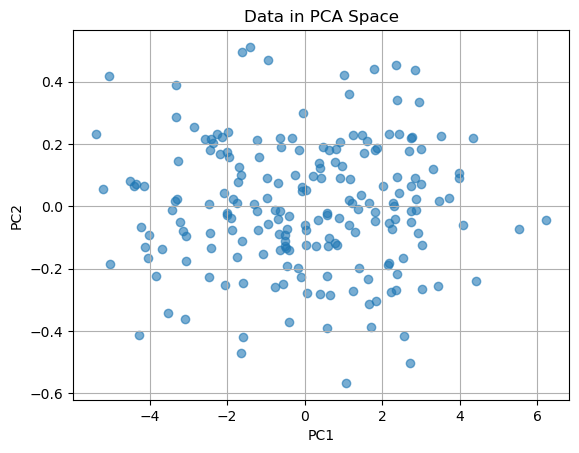

In [30]:
plt.scatter(X_pca[:,0],X_pca[:,1],alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data in PCA Space")
plt.grid()
plt.show()

##### Interpretation
* Data is now decorrelated
* Most variation lies along PC1

### 8. Dimensionality reduction (2D → 1D)

Keep only the most informative direction.

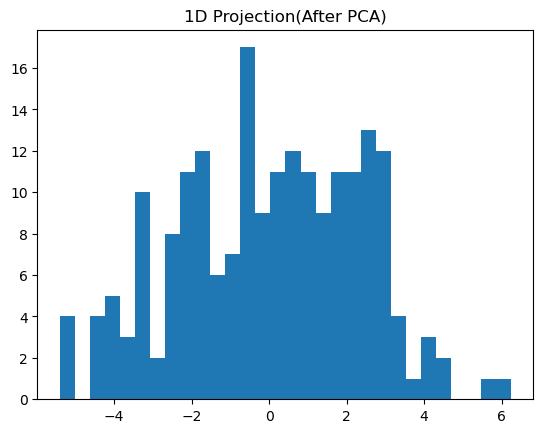

In [32]:
X_reduced = X_pca[:,0]  # keep PC1 only
plt.hist(X_reduced, bins = 30)
plt.title("1D Projection(After PCA)")
plt.show()
# This is PCA doing compression.

### 9. Reconstruction (what information is lost?)

In [33]:
X_approx = np.outer(X_reduced,eigenvectors[:,0])+X_mean

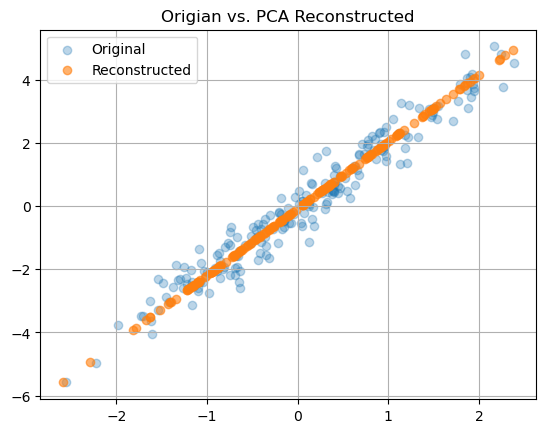

In [34]:
plt.scatter(X[:,0],X[:,1],alpha=0.3,label = "Original")
plt.scatter(X_approx[:,0],X_approx[:,1],alpha=0.6,label = "Reconstructed")
plt.legend()
plt.title("Origian vs. PCA Reconstructed")
plt.grid()
plt.show()

##### Key lesson
* PCA keeps variance, not exact points
* Some detail is lost, structure is preserved

### 10. Same thing using scikit-learn (for comparison)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_sklearn = pca.fit_transform(X)

print("Explained variance ratio:",pca.explained_variance_)
# Now we know what this actually does internally.

Explained variance ratio: [5.57088191]


#### Mental model to remember
* PCA = rotate → rank → drop → project
* No labels involved
* Finds directions of maximum spread
* Used for compression, denoising, visualization, speedup

### ractice suggestions
* Try uncorrelated data and observe PCA do nothing
* Increase noise and watch eigenvalues change
* Extend to 3D data and visualize projections
* Apply PCA before linear regression and compare results

# 🧘 The Geometric Intuition of PCA

> **Core Insight:** Think of PCA as changing how you look at the data, not changing the data itself.

---

### 1. What problem PCA is quietly solving
Real-world data usually possesses:
* **Many features** (High dimensionality)
* **Strong correlations** (Features that move together)
* **Redundant directions** (Information that is repeated)

Even though data lives in a high-dimensional space, it often really varies along far fewer directions. **PCA tries to find those underlying directions.**

### 2. The key shift in perspective
Instead of asking: 
> *“What are the original features doing?”*

PCA asks: 
> *“Along which directions does the data vary the most?”*

These directions are **not** the original axes; they are new axes chosen to align with the data’s natural spread.

---

### 3. Imagine a cloud of points
Picture a stretched, elliptical cloud in 2D:
* **Long** in one diagonal direction.
* **Narrow** in the perpendicular direction.

The original $x$ and $y$ axes cut across this cloud awkwardly. 

**PCA effectively:**
1. **Rotates** the coordinate system.
2. **Lines up** one axis with the longest stretch of the cloud.
3. **Captures** the remaining variation with the second axis.



*Nothing moves. Only the axes rotate.*

---

### 4. Why variance matters
In PCA, **Variance = Information.**
* **High variance** $\rightarrow$ Meaningful structure.
* **Low variance** $\rightarrow$ Noise or redundancy.

PCA keeps directions where points spread out the most and discards directions where they barely move.

### 5. What “dimensionality reduction” really means
When you drop dimensions after PCA, you are essentially saying:
> *"I only care about the directions where the data actually changes."*

* **You are not deleting features.**
* **You are ignoring directions where almost nothing happens.**

---

### 6. Why PCA decorrelates features
In the new coordinate system provided by PCA:
* Each axis captures an **independent mode** of variation.
* Movement along one axis tells you nothing about the others.
* This is why models often train faster and more efficiently after PCA.

### 7. What PCA does NOT do
It is important to remember the limitations:
* ❌ It does **not** look at labels (it is unsupervised).
* ❌ It does **not** try to separate classes (that is LDA).
* ❌ It does **not** find nonlinear structure (it assumes linearity).

### 8. The deep intuition to keep
PCA is about discovering the **geometry** of the data:
1. Where does it stretch?
2. Where does it stay flat?
3. How many directions does it really need?

Once you see data as a **geometric object** instead of a table of numbers, PCA becomes obvious rather than mysterious.